https://cloud.tencent.com/developer/article/1920955


https://blog.51cto.com/u_12855/6518219?u_atoken=81b2a73d-c075-4b6f-bbb0-7ec24defa2ab&u_asession=010iVtb8IEzLC_RkJjx--VNvL7JzYfsgo7lgB96tyJHhKtFU-k8XI7eiJZY461rt5hT-Ds_xnrTi5ulcGat1_QDtsq8AL43dpOnCClYrgFm6o&u_asig=05w-6owfGv64hvnGs4SAf_pJKa6YQmxDwzxAEWdkFH1rApxoQG_qYsYqJXZIV9FRtjX49mSz8p1xzlaPKC5Cab8m4R1qS48g5csx6xW6l-eqLVR67cVCxXjEH-_zU_ucy4eP_zUrmg_B7dK_ekv-IGaNdsBe98lzxiSZUgKuDMsm-rzX42s7XHfAuRP55RWE7IksmHjM0JOodanL5-M1Qs1RETy57G9fTWuPaxiE-PWeqhZfo4a0FPZ7M_hSdR0ieNaYmF1pNTmGOrCcuqwBCQxznETJDv7UBwA1M4ND0Ub4jUpLHxH1iRKZmnjAu0Zefw&u_aref=Kwcl5VUg8OT0IMYn6CAKfjcn%2B3E%3D

# 数据加密方式
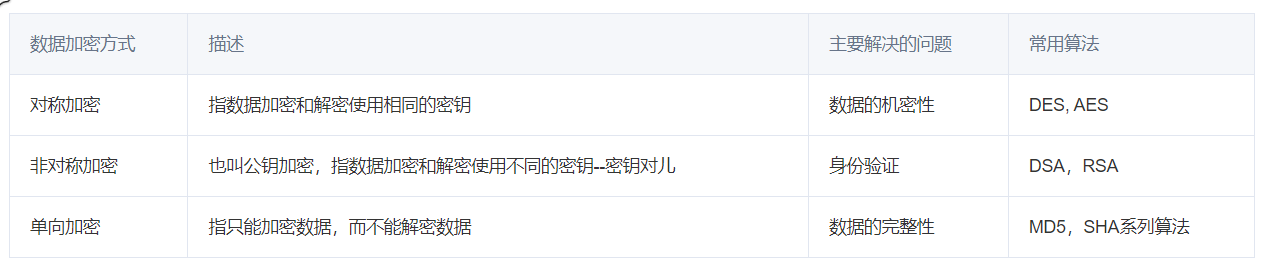

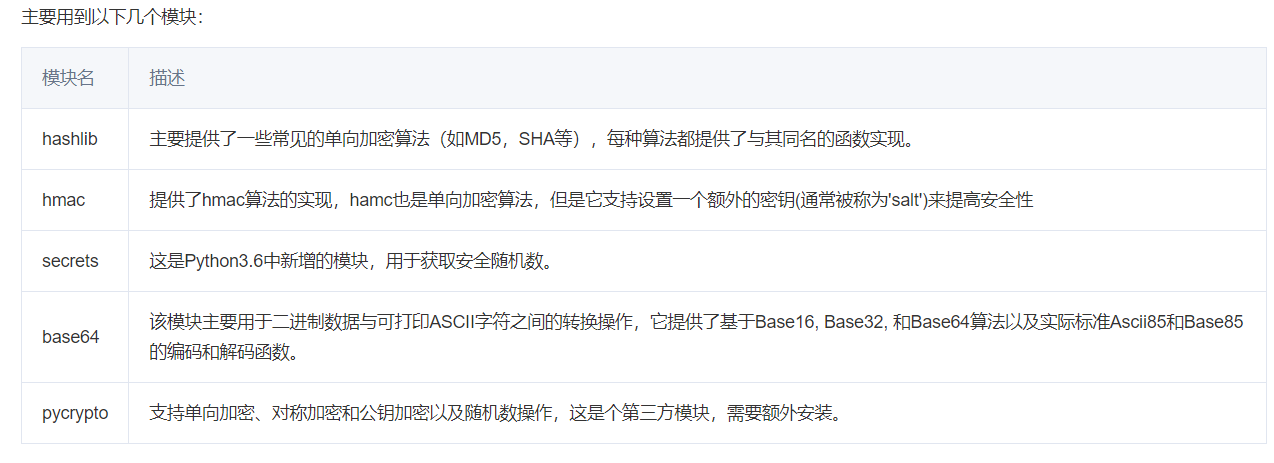



In [2]:
# 以上加密方式，都是对二进制编码的格式进行加密的，对应到Python中，则是我们的Bytes。所以当我们在Python中进行加密操作的时候，要确保我们操作的是Bytes，否则就会报错。将字符串和Bytes互相转换可以使用encode()和decode()方法。

str = 'abc'
byte = str.encode()

print(str)
print(byte)
print(byte.decode())


abc
b'abc'
abc


In [7]:
# base64
import base64

def base64_encode(s):
    return base64.b64encode(s.encode("utf-8")).decode("utf-8")

def base64_decode(s):
    return base64.b64decode(s.encode("utf-8")).decode("utf-8")

data = 'abc'
res = base64_encode(data)

print(data)
print(res)   
print(base64_decode(res))         

abc
YWJj
abc


In [6]:
# MD5加密，MD5可以保证唯一性
import hashlib

def md5sum(s):
    data = hashlib.md5()
    data.update(s.encode("utf-8"))
    return data.hexdigest()

data = "abc"

print(md5sum(data))


900150983cd24fb0d6963f7d28e17f72


In [4]:
# SHA256 
import hashlib

def sha256sum(s):
    sha = hashlib.sha256(s.encode("utf-8"))
    return sha.hexdigest()

data = "abc"

print(sha256sum(data))

ba7816bf8f01cfea414140de5dae2223b00361a396177a9cb410ff61f20015ad


In [39]:
# secrets 生成一个笃定长度的随机字符串，可用作密码，令牌和安全URL；
import secrets
import string

def generate_secret(length):
    alphanum = string.ascii_letters + string.digits
    return "".join(secrets.choice(alphanum) for _ in range(length))

print(generate_secret(16))

# 安全URL
url = "https://api.web.io/reset=" + secrets.token_urlsafe()

print(url)


mPQq1RKF8KdmPAG8
https://api.web.io/reset=LcGpd_ii39Zhdg4G4BohDn4X5kbQfqZeIUhQl-ds-dQ


In [2]:
# PyCryptodome
from Crypto.Cipher import AES, DES
from Crypto.Random import get_random_bytes

data = b'secret data'

key = get_random_bytes(16)
cipher = AES.new(key, AES.MODE_EAX)
ciphertext, tag = cipher.encrypt_and_digest(data)

file_out = open("encrypted.bin", "wb")
[ file_out.write(x) for x in (cipher.nonce, tag, ciphertext) ]
file_out.close()